In [3]:
import numpy as np
from astropy.table import Table
from matplotlib import pyplot as plt
%matplotlib inline

import os
homedir=os.getenv("HOME")

dat_path = homedir+'/Desktop/wisesize/'

In [4]:
wisetab = Table.read(dat_path+'a100-nsa-for-adap.fits')

### First task -- Reproduce Galaxy Selection from Proposal
#### 0.002<z<0.025, SNR(NUV) or SNR(W3)>20, r-band R$_e$ > 5.5" (will instead use 6.5")

In [5]:
#define W3 and GALEX (NUV) SNR:
w3_flux = wisetab['w3_nanomaggies']
w3_ivar = wisetab['w3_nanomaggies_ivar']     #1/sig^2
w3_snr = w3_flux * np.sqrt(w3_ivar)
w3_snr_col = wisetab['W3SNR']

galex_flux = wisetab['NMGY'][:,1]   #supposedly corresponds to NUV flux in nanomaggies (nmgy)
galex_ivar = wisetab['NMGY_IVAR'][:,1] 
NUV_snr = galex_flux * np.sqrt(galex_ivar)

In [56]:
#SNR>20. cut
snr_flag = ((w3_snr>20.) | (w3_snr_col>20.)) | (NUV_snr>20.)
snr_flag10 = ((w3_snr>10.) | (w3_snr_col>10.)) | (NUV_snr>10.)

In [58]:
zflag & re_flag & snr_flag
wise_flagtab = Table([wisetab['IAUNAME'],wisetab['RA'],wisetab['DEC'],zflag,snr_flag,
                      snr_flag10,re_flag,re_flag_55],
                     names=['IAUNAME','RA','DEC','zflag','snrflag_20',
                            'snrflag_10','re_flag65','re_flag55'])

In [51]:
#r-band Re > 6.5" cut   (change to 5.5" to exactly replicate proposal values)
re_1 = wisetab['SERSIC_TH50']
re_2 = wisetab['petroR50_r']
re_flag = (re_1>6.5) | (re_2>6.5)
re_flag_55 = (re_1>5.5) | (re_2>5.5)

### Generating Flag Table

In [30]:
#redshift 0.002<z<0.025 cut
zmin=0.002
zmax=0.025

z = wisetab['ZDIST']
vhelio = wisetab['Vhelio']
z_flag = (z>zmin) & (z<zmax)
vhelioflag = (vhelio>(zmin*3e5)) & (vhelio<(zmax*3e5))
zflag = z_flag | vhelioflag   #use both as a "check"

In [59]:
wise_flagtab.write(homedir+'/Desktop/wisesize/WISESize_flags_v1.fits',overwrite=True)

### RA v. DEC

In [31]:
proposal_sample = wisetab[zflag & re_flag & snr_flag]

In [32]:
ra = proposal_sample['RA']
dec = proposal_sample['DEC']
z = proposal_sample['ZDIST']

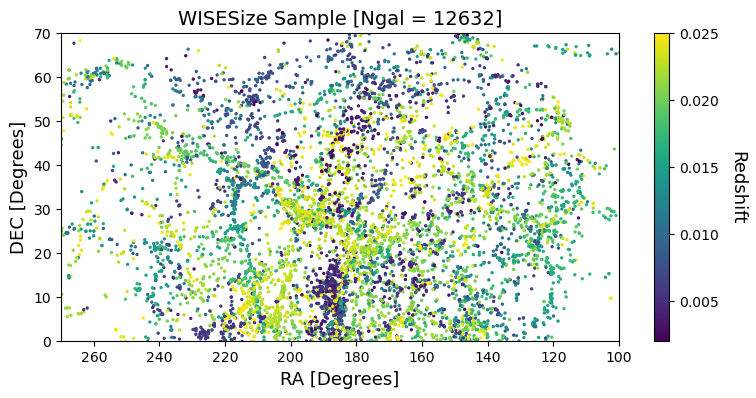

In [50]:
plt.figure(figsize=(9,4))
plt.scatter(ra,dec,c=z,s=2)
plt.xlim(270,100)
plt.ylim(0,70)
plt.clim(0.002,0.025)
cbar = plt.colorbar()
cbar.set_label('Redshift',fontsize=13,rotation=270,labelpad=20)
plt.xlabel('RA [Degrees]',fontsize=13)
plt.ylabel('DEC [Degrees]',fontsize=13)
plt.title(f'WISESize Sample [Ngal = {len(proposal_sample)}]',fontsize=14)
plt.show()

---

### NED-LVS 

In [60]:
ned_sample = Table.read(homedir+'/Downloads/NEDLVS_20210922_v2.fits')

In [65]:
redshift_flag = (ned_sample['z']>0.002) & (ned_sample['z']<0.025)
ra_flag = (ned_sample['ra']>100.) & (ned_sample['ra']<270.)
dec_flag = (ned_sample['z']>0.) & (ned_sample['z']<70.)

In [67]:
len(ned_sample[redshift_flag&ra_flag&dec_flag])

50503

---

In [68]:
ned_sample

objname,ra,dec,objtype,z,z_unc,z_tech,z_qual,z_qual_flag,z_refcode,ziDist,ziDist_unc,ziDist_method,ziDist_indicator,ziDist_refcode,DistMpc,DistMpc_unc,DistMpc_method,ebv,A_FUV_MWext,A_NUV_MWext,A_J_MWext,A_H_MWext,A_Ks_MWext,A_W1_MWext,A_W2_MWext,A_W3_MWext,A_W4_MWext,m_FUV,m_FUV_unc,m_NUV,m_NUV_unc,Lum_FUV,Lum_FUV_unc,Lum_NUV,Lum_NUV_unc,GALEXphot,m_J,m_J_unc,m_H,m_H_unc,m_Ks,m_Ks_unc,Lum_J,Lum_J_unc,Lum_H,Lum_H_unc,Lum_Ks,Lum_Ks_unc,tMASSphot,m_W1,m_W1_unc,m_W2,m_W2_unc,m_W3,m_W3_unc,m_W4,m_W4_unc,Lum_W1,Lum_W1_unc,Lum_W2,Lum_W2_unc,Lum_W3,Lum_W3_unc,Lum_W4,Lum_W4_unc,WISEphot,SFR_W4,SFR_W4_unc,SFR_hybrid,SFR_hybrid_unc,ET_flag,Mstar,Mstar_unc,MLratio
bytes30,float64,float64,bytes6,float32,float32,bytes4,bool,bool,bytes19,float64,float64,bytes30,bytes1,bytes19,float32,float32,bytes30,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,bytes5,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,bytes5,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,float64,float64,float64,float64,bool,float64,float64,float32
UGC 00002,0.60808,44.92089,G,6.258e-02,--,PHOT,False,False,2014ApJS..210....9B,--,--,--,--,--,282.33,--,Redshift,0.0809,0.648,0.727,0.066,0.041,0.028,0.016,0.011,0.004,0.002,--,--,--,--,--,--,--,--,--,13.577,0.083,12.717,0.094,12.445,0.108,1.4540e+44,1.1115e+43,1.4979e+44,1.2969e+43,9.5327e+43,9.4827e+42,XSC,12.088,0.008,11.948,0.018,8.604,0.017,7.097,0.131,3.9156e+43,2.8852e+41,1.7926e+43,2.9720e+41,2.8449e+43,4.4546e+41,1.5723e+43,1.8971e+42,APER,3.0717e+00,3.7063e-01,--,--,False,1.2391e+11,9.1305e+08,0.5000
KUG 2359+213,0.61296,21.58786,G,2.759e-02,4.3000e-05,None,False,False,1993AJ....105.1271G,--,--,--,--,--,121.35,0.19,Redshift,0.0414,0.332,0.372,0.034,0.021,0.014,0.008,0.006,0.002,0.001,18.322,0.019,17.954,0.010,8.0539e+42,1.3839e+41,7.8486e+42,7.0966e+40,MSC,14.286,0.105,13.614,0.136,13.457,0.182,1.3574e+43,1.3127e+42,1.1893e+43,1.4897e+42,6.8472e+42,1.1478e+42,XSC,12.910,0.018,12.990,0.076,9.950,0.198,8.270,0.319,3.3686e+42,5.5848e+40,1.2621e+42,8.8346e+40,1.5185e+42,2.7693e+41,9.8510e+41,2.8944e+41,APER,1.9245e-01,5.6546e-02,5.2536e-01,5.0140e-02,False,1.0660e+10,1.7673e+08,0.5000
MCG -01-01-024,0.64504,-3.71072,G,2.156e-02,7.0000e-06,None,False,False,2005ApJS..160..149S,100.35,2.60,Wavg,S,Mix,100.35,2.60,zIndependent,0.0336,0.269,0.302,0.027,0.017,0.012,0.007,0.005,0.002,0.001,--,--,16.580,0.007,--,--,1.7826e+43,1.1503e+41,MSC,11.893,0.030,11.265,0.044,10.836,0.051,8.3613e+43,2.3104e+42,7.0502e+43,2.8572e+42,5.2208e+43,2.4525e+42,XSC,10.752,0.006,10.605,0.011,7.052,0.009,5.026,0.020,1.6786e+43,9.2763e+40,7.7546e+42,7.8568e+40,1.4975e+43,1.2413e+41,1.3363e+43,2.4616e+41,APER,2.6106e+00,4.8091e-02,--,--,False,5.3119e+10,2.9356e+08,0.5000
CGCG 408-013,0.66625,8.73700,G,1.847e-02,3.5000e-05,None,False,False,2005ApJS..160..149S,72.59,0.94,Wavg,S,Mix,72.59,0.94,zIndependent,0.0563,0.451,0.506,0.046,0.028,0.020,0.011,0.008,0.003,0.002,20.392,0.223,19.559,0.100,4.7799e+41,9.8049e+40,7.2417e+41,6.6623e+40,ASC,12.525,0.040,11.728,0.049,11.386,0.055,2.4867e+43,9.1617e+41,2.4343e+43,1.0987e+42,1.6583e+43,8.4008e+41,XSC,11.236,0.006,11.136,0.010,7.898,0.013,5.815,0.041,5.6483e+42,3.1214e+40,2.4957e+42,2.2987e+40,3.5993e+42,4.3097e+40,3.3832e+42,1.2776e+41,APER,6.6095e-01,2.4960e-02,6.0283e-01,2.2391e-02,True,1.7874e+10,9.8780e+07,0.5000
IC 5379,0.66958,16.60028,G,2.095e-02,2.1000e-05,None,False,False,2005ApJS..160..149S,--,--,--,--,--,91.70,0.09,Redshift,0.0304,0.243,0.273,0.025,0.015,0.011,0.006,0.004,0.002,0.001,18.541,0.078,18.240,0.040,3.4655e+42,2.4947e+41,3.1428e+42,1.1463e+41,ASC,15.342,0.128,14.784,99.000,14.508,99.000,2.9064e+42,3.4265e+41,2.2997e+42,--,1.4798e+42,--,PSC,12.925,0.017,12.838,0.040,10.039,0.077,8.498,0.492,1.8932e+42,2.9644e+40,8.2776e+41,3.0497e+40,7.9838e+41,5.6623e+40,4.5581e+41,